<a href="https://colab.research.google.com/github/timdanilov/GWP2/blob/tim/GWP_Submission_2_20220118_0500UTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context: Assume you are an Alternative Investments (gold and/or bitcoin) Portfolio Manager. Then the world was impacted by a pandemic. Compare 3 asset classes during COVID-19. 

# Steps 1 through 7 must be done using Python in a Jupyter notebook or R knitted file. Be sure to explicitly show output, either numerically or visually, whichever seems more appropriate.
See the "Rubric" and "Submission Checklist" tab for more details. 

# 00 Scratch Pad - DELETE BEFORE SUBMISSION

github email link

# 0 Selecting a data set

## 0.1 Select a gold Exchange Traded Fund.

## 0.2 Select an equity ETF from outside the US

## 0.3 Select bitcoin.

# 1 Data Importing

In [15]:
!pip install arch --quiet
import arch
import requests
import pandas as pd
import numpy as np
from numpy import log as ln
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from scipy import stats
from datetime import datetime
import datetime as dt

#!pip install nelson-siegel-svensson --quiet
#from nelson_siegel_svensson import NelsonSiegelSvenssonCurve, NelsonSiegelCurve
#from nelson_siegel_svensson.calibrate import calibrate_ns_ols, calibrate_nss_ols

%matplotlib inline

# use nasdaq-data-link (formerly quandl) to import Treasuries data
#!pip install nasdaq-data-link --quiet
#import nasdaqdatalink
#nasdaqdatalink.ApiConfig.api_key = 'vCzcvd_o4XYc6qtUftWP'
#nasdaqdatalink.ApiConfig.api_key = 'zLwEE3QvSuDe3Vi7Xgf6'

#use yfinance to import data for etf's
!pip install yfinance --quiet
import yfinance as yf

## 1.1 Import closing prices for the entire year of 2020 for your gold ETF, your equity ETF, and bitcoin.  

## *Dates* -- All of 2020

In [16]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020, 12, 31)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Bitcoin')

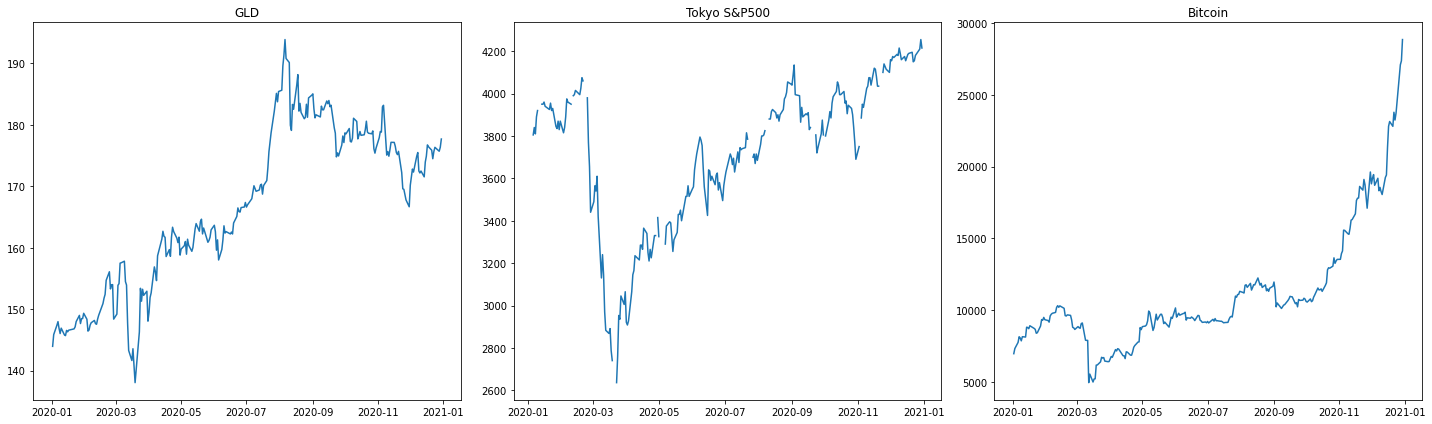

In [38]:
#I would suggest this code for getting closing prices for whole entire year of 2020

etfs = ['GLD', '1547.T', 'BTC-USD'] 
closing_price = pd.DataFrame()
for ticker in etfs:
  closing_price[ticker] = yf.download(ticker, start, end)['Adj Close']
closing_price.head()

#Plotting the prices

plt.rcParams['figure.figsize'] = [20, 6]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(closing_price['GLD'])
ax1.set_title('GLD')
ax2.plot(closing_price['1547.T'])
ax2.set_title('Tokyo S&P500')
ax3.plot(closing_price['BTC-USD'])
ax3.set_title('Bitcoin')


## Gold ETF

In [ ]:
# Get Gold Data using api 
########################################
ticker_symbol = 'GLD'

GLD_df = yf.download(ticker_symbol, 
                      start=start, 
                      end=end)
GLD_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,143.860001,144.210007,143.399994,143.949997,143.949997,7733800
2020-01-03,145.750000,146.320007,145.399994,145.860001,145.860001,12272800
2020-01-06,148.440002,148.479996,146.949997,147.389999,147.389999,14403300
2020-01-07,147.570007,148.139999,147.429993,147.970001,147.970001,7978500
2020-01-08,148.490005,148.610001,146.139999,146.860001,146.860001,22248500


In [ ]:
GLD_df.info()
print()
# print(GLD_df.shape)
GLD_df.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB



(252, 6)

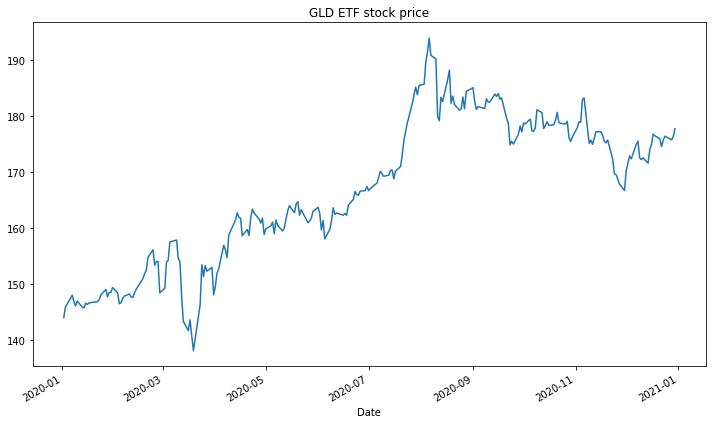

In [ ]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
GLD_df['Adj Close'].plot(title="GLD ETF stock price")

## Equity ETF

In [5]:
# Get ETF Data using api 
########################################
# Moscow Exchange
#ticker_symbol = 'FXUS.ME'
# TIM, IS THIS THE RIGHT SYMBOL?
# AS YOU CAN SEE WITH THE PLOT BELOW, THE DATA IS RATHER ERRATIC


# London Exchange
#http://www.twenty20investments.com/ETFAdviser/ETFSearch.aspx
# ticker_symbol = 'SPXP'

# Tokyo S&P500
ticker_symbol = '1547.T'
#James, data for this ETF seems to be more complete, let's use it.

#
EQUITY_df = yf.download(ticker_symbol, 
                      start=start, 
                      end=end)
EQUITY_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-06,3790.0,3810.0,3785.0,3805.0,3805.0,28560
2020-01-07,3840.0,3850.0,3830.0,3840.0,3840.0,62070
2020-01-08,3780.0,3820.0,3735.0,3810.0,3810.0,38270
2020-01-09,3880.0,3895.0,3880.0,3890.0,3890.0,14910
2020-01-10,3920.0,3930.0,3915.0,3920.0,3920.0,12470


In [6]:
EQUITY_df.info()
print()
EQUITY_df.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2020-01-06 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       242 non-null    float64
 1   High       242 non-null    float64
 2   Low        242 non-null    float64
 3   Close      242 non-null    float64
 4   Adj Close  242 non-null    float64
 5   Volume     242 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.2 KB



(242, 6)

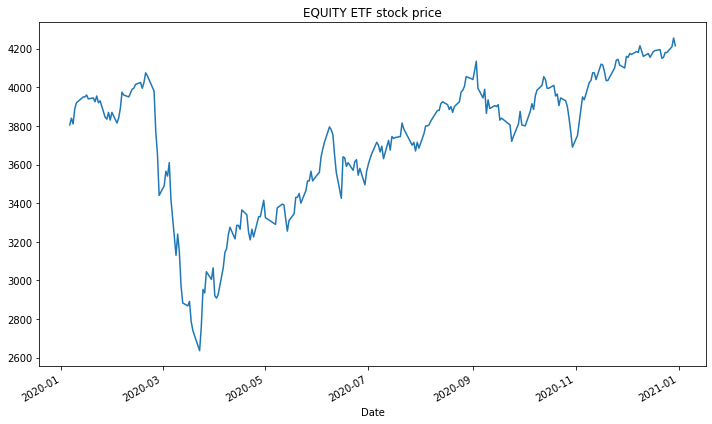

In [8]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
EQUITY_df['Adj Close'].plot(title="EQUITY ETF stock price")

In [ ]:
# Get ETF Data using api 
########################################
# Moscow Exchange
# ticker_symbol = 'FXUS.ME'

# London Exchange
#http://www.twenty20investments.com/ETFAdviser/ETFSearch.aspx
# ticker_symbol = 'SPXP'

# Tokyo S&P500
ticker_symbol = '1547.T'

#
EQUITY_df = yf.download(ticker_symbol, 
                      start=start, 
                      end=end)
EQUITY_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-06,3790.0,3810.0,3785.0,3805.0,3805.0,28560
2020-01-07,3840.0,3850.0,3830.0,3840.0,3840.0,62070
2020-01-08,3780.0,3820.0,3735.0,3810.0,3810.0,38270
2020-01-09,3880.0,3895.0,3880.0,3890.0,3890.0,14910
2020-01-10,3920.0,3930.0,3915.0,3920.0,3920.0,12470


In [ ]:
EQUITY_df.info()
print()
# print(EQUITY_df.shape)
EQUITY_df.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2020-01-06 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       242 non-null    float64
 1   High       242 non-null    float64
 2   Low        242 non-null    float64
 3   Close      242 non-null    float64
 4   Adj Close  242 non-null    float64
 5   Volume     242 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.2 KB



(242, 6)

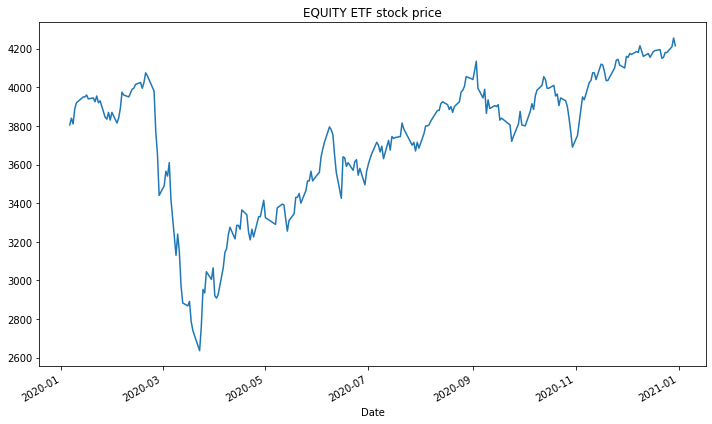

In [ ]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
EQUITY_df['Adj Close'].plot(title="EQUITY ETF stock price")

## Bitcoin

In [9]:
# Get BITCOIN Data using api 
########################################

ticker_symbol = 'BTC-USD'

BITCOIN_df = yf.download(ticker_symbol, 
                      start=start, 
                      end=end)
BITCOIN_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [ ]:
BITCOIN_df.info()
print()
# print(BITCOIN_df.shape)
BITCOIN_df.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-01-01 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       366 non-null    float64
 1   High       366 non-null    float64
 2   Low        366 non-null    float64
 3   Close      366 non-null    float64
 4   Adj Close  366 non-null    float64
 5   Volume     366 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.0 KB



(366, 6)

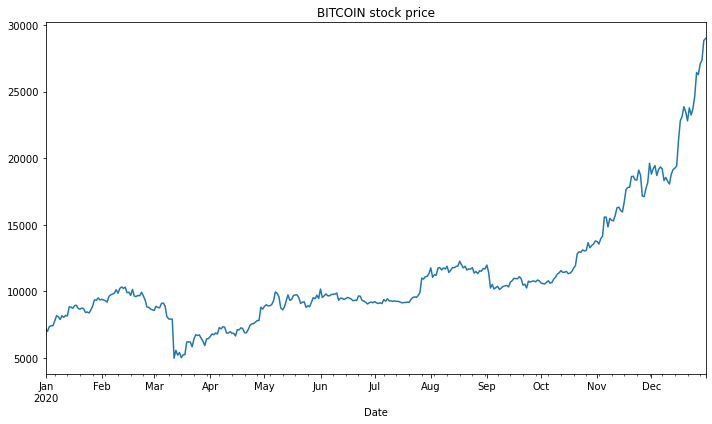

In [ ]:
BITCOIN_df['Adj Close'].plot(title="BITCOIN stock price")

## 1.2 Import your gold ETF prices for the months of April 2020 through Dec 2020.  (Therefore, you do not need the first few months of data you imported)

## Dates -- April - Dec 2020

In [ ]:
start = datetime.datetime(2020, 4, 1)
end = datetime.datetime(2020, 12, 31)

## Gold ETF

In [42]:
# Get Gold Data using api 
########################################
ticker_symbol = 'GLD'

GLD_df = yf.download(ticker_symbol, 
                      start=start, 
                      end=end)
GLD_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,143.860001,144.210007,143.399994,143.949997,143.949997,7733800
2020-01-03,145.750000,146.320007,145.399994,145.860001,145.860001,12272800
2020-01-06,148.440002,148.479996,146.949997,147.389999,147.389999,14403300
2020-01-07,147.570007,148.139999,147.429993,147.970001,147.970001,7978500
2020-01-08,148.490005,148.610001,146.139999,146.860001,146.860001,22248500


In [ ]:
GLD_df.info()
print()
# print(GLD_df.shape)
GLD_df.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 190 entries, 2020-04-01 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       190 non-null    float64
 1   High       190 non-null    float64
 2   Low        190 non-null    float64
 3   Close      190 non-null    float64
 4   Adj Close  190 non-null    float64
 5   Volume     190 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.4 KB



(190, 6)

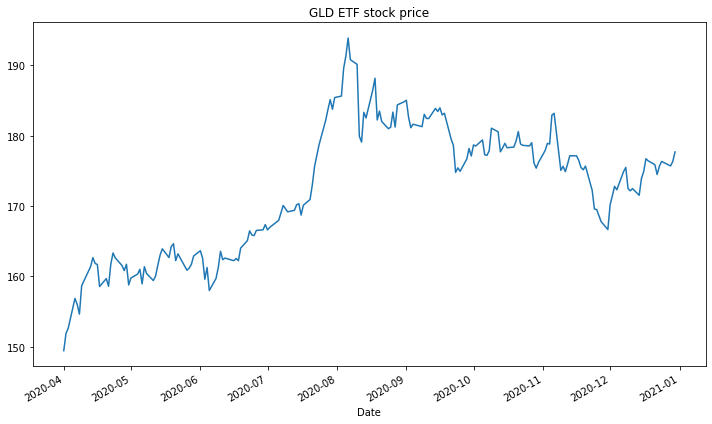

In [ ]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
GLD_df['Adj Close'].plot(title="GLD ETF stock price")

## 1.3 Import your equity ETF prices for the months of April 2020 through Dec 2020.  (Therefore, you do not need the first few months of data you imported)

In [ ]:
# Get ETF Data using api 
########################################
# Moscow Exchange
# ticker_symbol = 'FXUS.ME'

# London Exchange
#http://www.twenty20investments.com/ETFAdviser/ETFSearch.aspx
# ticker_symbol = 'SPXP'

# Tokyo S&P500
ticker_symbol = '1547.T'

#
EQUITY_df = yf.download(ticker_symbol, 
                      start=start, 
                      end=end)
EQUITY_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,2968.0,2987.0,2907.0,2921.0,2921.0,50540
2020-04-02,2895.0,2926.0,2875.0,2908.0,2908.0,29030
2020-04-03,2969.0,2987.0,2900.0,2927.0,2927.0,38200
2020-04-06,2973.0,3075.0,2973.0,3065.0,3065.0,54850
2020-04-07,3160.0,3165.0,3100.0,3145.0,3145.0,82930


In [ ]:
EQUITY_df.info()
print()
# print(EQUITY_df.shape)
EQUITY_df.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2020-04-01 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       184 non-null    float64
 1   High       184 non-null    float64
 2   Low        184 non-null    float64
 3   Close      184 non-null    float64
 4   Adj Close  184 non-null    float64
 5   Volume     184 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.1 KB



(184, 6)

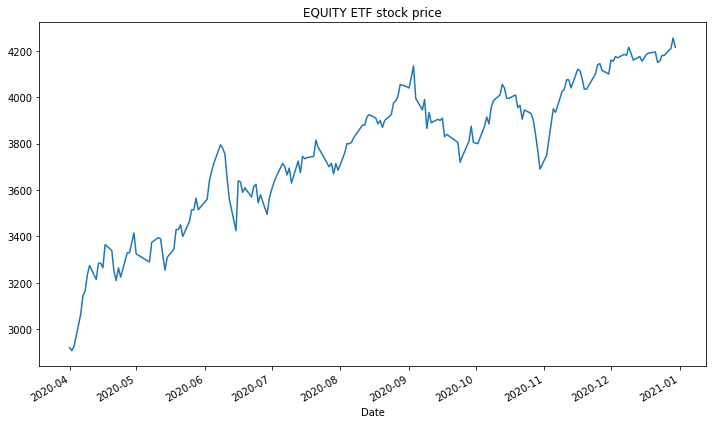

In [ ]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
EQUITY_df['Adj Close'].plot(title="EQUITY ETF stock price")

## 1.4 Import your bitcoin prices for the months of April 2020 through Dec 2020.  (Therefore, you do not need the first few months of data you imported)

In [ ]:
# Get BITCOIN Data using api 
########################################

ticker_symbol = 'BTC-USD'

BITCOIN_df = yf.download(ticker_symbol, 
                      start=start, 
                      end=end)
BITCOIN_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,6437.319336,6612.573730,6202.373535,6606.776367,6606.776367,40346426266
2020-04-02,6606.776367,7088.247559,6595.918457,6793.624512,6793.624512,47660646124
2020-04-03,6797.396484,7003.220703,6673.335938,6733.387207,6733.387207,38976504903
2020-04-04,6738.382812,6878.953613,6696.484863,6867.527344,6867.527344,33185988584
2020-04-05,6862.537598,6883.414062,6715.929199,6791.129395,6791.129395,29510409856


In [ ]:
BITCOIN_df.info()
print()
# print(BITCOIN_df.shape)
BITCOIN_df.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 275 entries, 2020-04-01 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       275 non-null    float64
 1   High       275 non-null    float64
 2   Low        275 non-null    float64
 3   Close      275 non-null    float64
 4   Adj Close  275 non-null    float64
 5   Volume     275 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 15.0 KB



(275, 6)

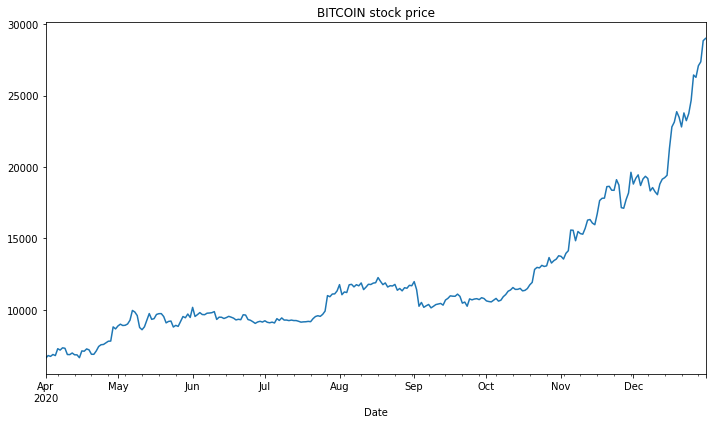

In [ ]:
BITCOIN_df['Adj Close'].plot(title="BITCOIN stock price")

# 2 Data Processing

## 2.1 Compute the daily returns of your gold ETF, your Equity ETF, and bitcoin of April 2020 through Dec 2020

In [ ]:
GLD_daily_return = ln(GLD_df["Adj Close"] / GLD_df["Adj Close"].shift(1))
GLD_daily_return.head()

Date
2020-04-01         NaN
2020-04-02    0.016261
2020-04-03    0.004925
2020-04-06    0.027334
2020-04-07   -0.005369
Name: Adj Close, dtype: float64

In [ ]:
GLD_daily_return.dropna(inplace=True)
GLD_daily_return.head()

Date
2020-04-02    0.016261
2020-04-03    0.004925
2020-04-06    0.027334
2020-04-07   -0.005369
2020-04-08   -0.008948
Name: Adj Close, dtype: float64

In [ ]:
EQUITY_daily_return = ln(EQUITY_df["Adj Close"] / EQUITY_df["Adj Close"].shift(1))
EQUITY_daily_return.head()

Date
2020-04-01         NaN
2020-04-02   -0.004460
2020-04-03    0.006512
2020-04-06    0.046070
2020-04-07    0.025766
Name: Adj Close, dtype: float64

In [ ]:
EQUITY_daily_return.dropna(inplace=True)
EQUITY_daily_return.head()

Date
2020-04-02   -0.004460
2020-04-03    0.006512
2020-04-06    0.046070
2020-04-07    0.025766
2020-04-08    0.006339
Name: Adj Close, dtype: float64

In [ ]:
BITCOIN_daily_return = ln(BITCOIN_df["Adj Close"] / BITCOIN_df["Adj Close"].shift(1))
BITCOIN_daily_return.head()

Date
2020-04-01         NaN
2020-04-02    0.027889
2020-04-03   -0.008906
2020-04-04    0.019726
2020-04-05   -0.011187
Name: Adj Close, dtype: float64

In [ ]:
BITCOIN_daily_return.dropna(inplace=True)
BITCOIN_daily_return.head()

Date
2020-04-02    0.027889
2020-04-03   -0.008906
2020-04-04    0.019726
2020-04-05   -0.011187
2020-04-06    0.068384
Name: Adj Close, dtype: float64

# 3 Data Summaries

## 3.1 Compute a 20-day moving average price of your gold ETF.  The moving average price on 1 April 2020 should include data from March.  Be sure to either graph or show a table of these values.

Date
2020-04-01    149.164499
2020-04-02    148.884998
2020-04-03    148.639998
2020-04-06    148.593498
2020-04-07    148.671498
                 ...    
2020-12-23    172.893500
2020-12-24    173.235500
2020-12-28    173.631501
2020-12-29    174.115501
2020-12-30    174.491502
Name: Adj Close, Length: 190, dtype: float64


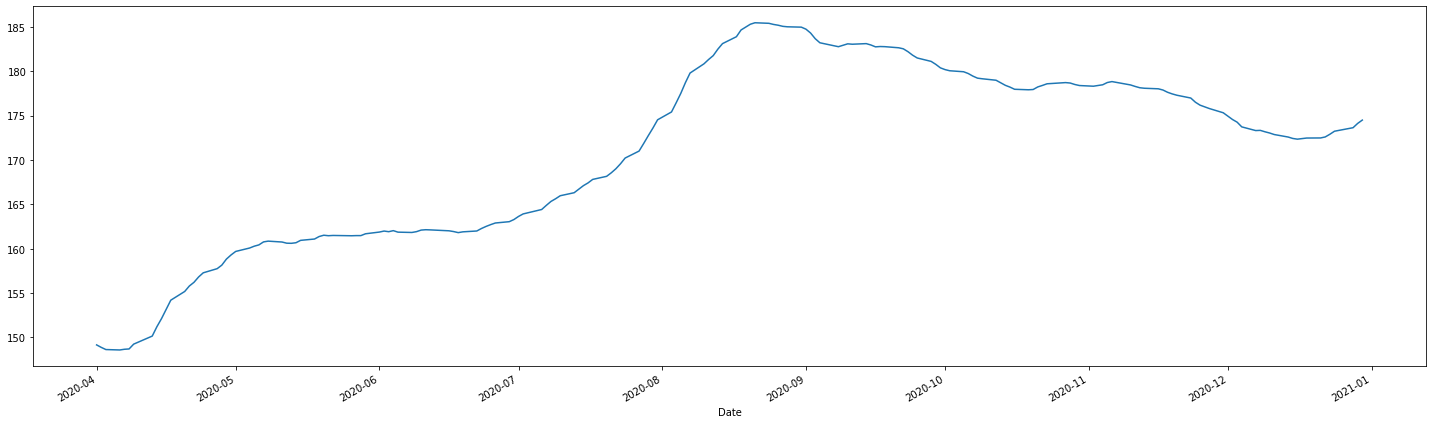

In [80]:
GLD_ma = GLD_df["Adj Close"]['2020-3':'2020-12'].rolling(window=20).mean()['2020-4-1':]
print(GLD_ma)
GLD_ma.plot()

## 3.2 Compute a 20-day moving average price of your equity ETF.  The moving average price on 1 April 2020 should include data from March.

Date
2020-04-01    3027.30
2020-04-02    2995.70
2020-04-03    2961.55
2020-04-06    2943.80
2020-04-07    2944.55
               ...   
2020-12-24    4168.00
2020-12-25    4171.25
2020-12-28    4176.75
2020-12-29    4181.50
2020-12-30    4184.50
Name: Adj Close, Length: 184, dtype: float64


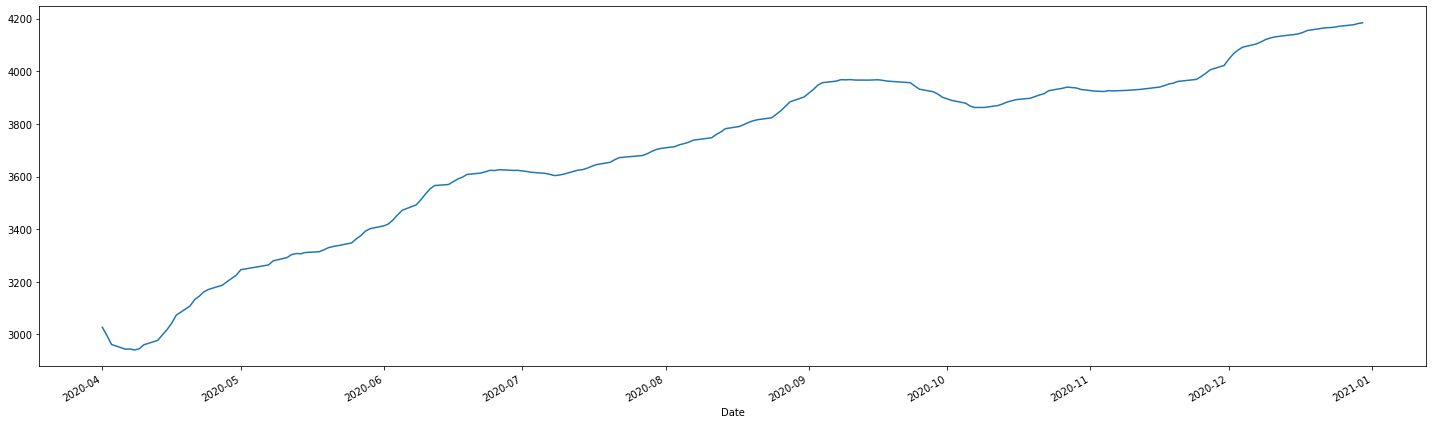

In [70]:
EQUITY_ma = EQUITY_df["Adj Close"]['2020-3':'2020-12'].rolling(window=20).mean()['2020-4-1':]
print(EQUITY_ma)
EQUITY_ma.plot()

## 3.3 Compute a 20-day moving average price of bitcoin.  The moving average price on 1 April 2020 should include data from March.

Date
2020-04-01     6034.907422
2020-04-02     6096.403296
2020-04-03     6173.054346
2020-04-04     6246.814966
2020-04-05     6335.647437
                  ...     
2020-12-27    21767.354687
2020-12-28    22205.537891
2020-12-29    22645.963965
2020-12-30    23174.762012
2020-12-31    23721.902832
Name: Adj Close, Length: 275, dtype: float64


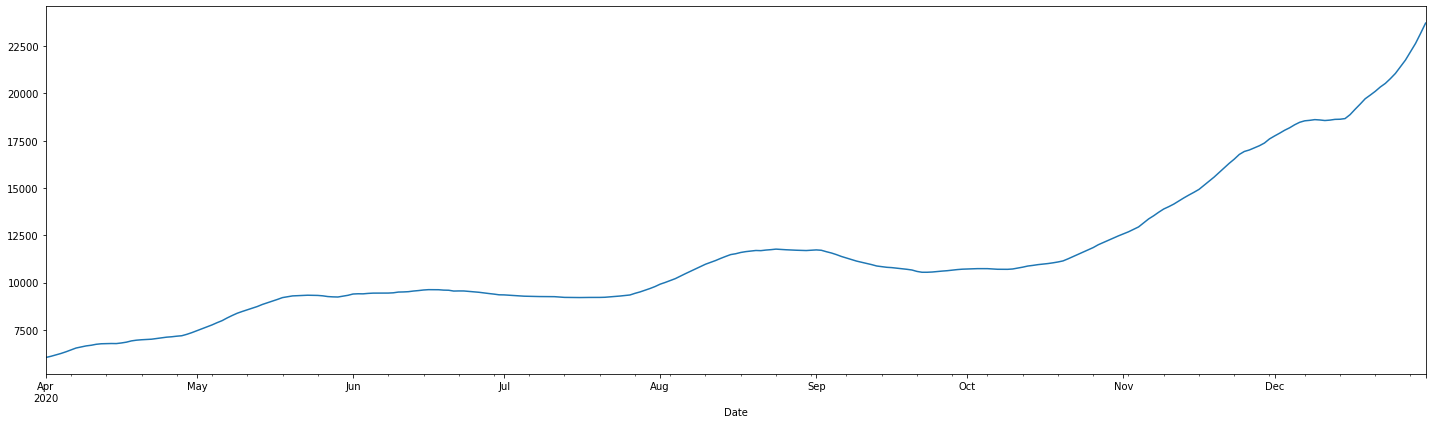

In [69]:
BITCOIN_ma = BITCOIN_df["Adj Close"]['2020-3':'2020-12'].rolling(window=20).mean()['2020-4-1':]
print(BITCOIN_ma)
BITCOIN_ma.plot()

# 4 Graphing

## 4.1 Graph each price series along with its moving average from April 2020 through Dec 2020.

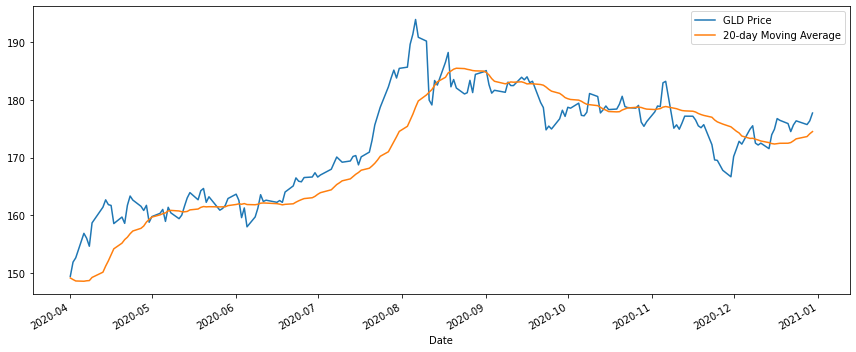

In [74]:
plt.figure(figsize=(12,5))

ax1 = GLD_df['Adj Close']['2020-04':'2020-12'].plot(label='GLD Price')
ax2 = GLD_ma.plot(label='20-day Moving Average')

plt.legend()
plt.show()

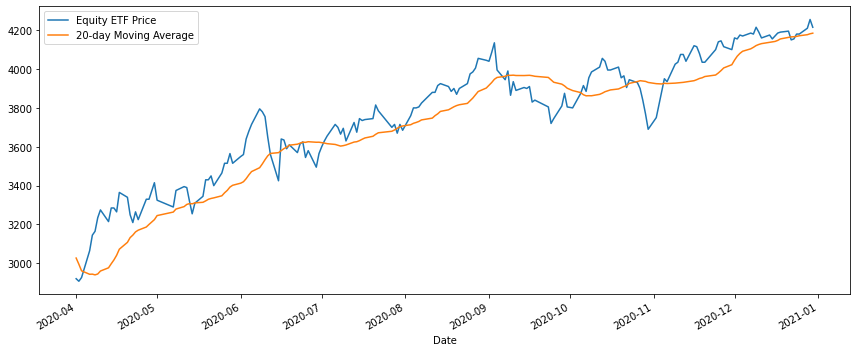

In [78]:
plt.figure(figsize=(12,5))

ax1 = EQUITY_df['Adj Close']['2020-04':'2020-12'].plot(label='Equity ETF Price')
ax2 = EQUITY_ma.plot(label='20-day Moving Average')

plt.legend()
plt.show()

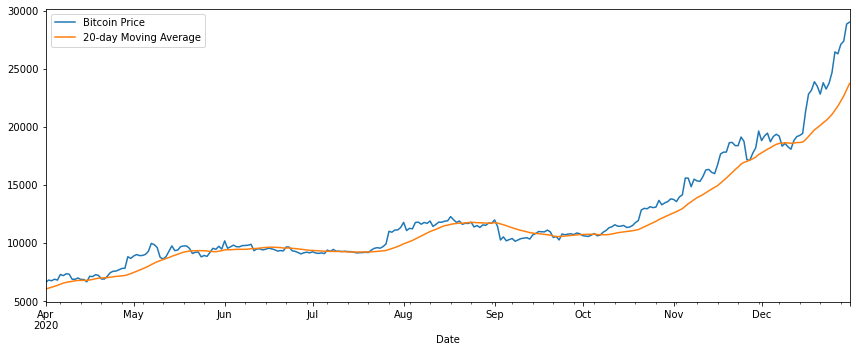

In [76]:
plt.figure(figsize=(12,5))

ax1 = BITCOIN_df['Adj Close']['2020-04':'2020-12'].plot(label='Bitcoin Price')
ax2 = BITCOIN_ma.plot(label='20-day Moving Average')

plt.legend()
plt.show()

## 4.2 Comments on how the price series and average series intersect or not.

## 4.3 Graph gold and equity prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend

## 4.4 Graph gold and bitcoin prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend

## 4.5 Graph equity and bitcoin prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend

# 5 Fitting a GARCH Model

## 5.1 Pick one of the 3 series (gold, equity, or bitcoin).  Fit a GARCH model for quarter 2 (Q2).  Fit a GARCH model for quarter 3 (Q3).  Fit a GARCH model for quarter 4 (Q4).

## 5.2 Repeat the process, but instead using GARCH-M Model

## 5.3 Repeat the process one more time, using another variation of GARCH (e.g. Threshold GARCH, Exponential GARCH, Integrated GARCH)

## 5.4 What are the 3 long-term variances indicated by the models. (1 point for each correct variance)

# 6 Assessing stationarity

## 6.1 Pick 1 of the 3 quarters in 2020 (Q2, Q3, or Q4).  Test your gold ETF for stationarity.  Explicitly state which test you used to determine stationarity

## 6.2 Using the same quarter, test your equity ETF for stationarity.  Explicitly state which test you used to determine stationarity

## 6.3 Using the same quarter, test Bitcoin for stationarity.  Explicitly state which test you used to determine stationarity

# 7 Modelling Cointegration

## 7.1 Using Q2 and Q3 data (April - Sept period), test all the 3 combinations of cointegration using Engle-Granger and Johansen test as following: (gold, equity), (equity, bitcoin) and (bitcoin, gold).

## 7.2Explain if Johansen test and Engle-Granger provided different results. 

## 7.3 Implement a VEC model and forecast Q4 evolution. Comment results. (Provide arguments if VEC can not be used).

## 7.4 Implement a VAR model and forecast Q4 evolution. Comment results. 

## 7.5 Repeat the entire process using all three variables (equity, gold and bitcoin). Comment forecasts and results. 

# 8 Correlation vs Cointegration

## Discuss as a group and include the answers in the html document. Briefly explain your answers with an example from the data set you are using. Max 300 words.

## 8.1 Does correlation have a direction?  In other words, is the correlation of x and y equal to correlation of y and x?

## 8.2 Does linear regression have a direction?  Are the slope and intercept the same if x is regressed on y, or y is regressed on x?

## 8.3 Does cointegration have a direction?  Will the cointegrating vector be the same if x is regressed on y, or if y is regressed on x?